In [1]:
# add parent directory to path: enable import from parent dir
import sys
sys.path.append('../')

from environment import GridEnv
from dqn import DQN
from nn import Net

import numpy as np
import matplotlib.pyplot as plt
import torch.nn as nn
import torch

In [2]:
MAZE = np.array([
    [ 1.,  0.,  1.,  1.],
    [ 1.,  1.,  1.,  0.],
    [ 0.,  0.,  1.,  1.],
    [ 1.,  0.,  1.,  0.],
])

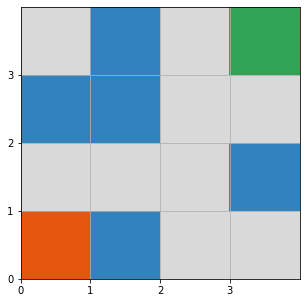

In [3]:
deterministic_env = GridEnv(
    maze=MAZE.copy(),
    is_stochastic=False,
    action_transitions={
        'w': 1,
        's': 1,
        'd': 1,
        'a': 1,
    },
    max_timesteps=500,
    full_state=True,
)

In [4]:
target_net = Net(
    input_dim=deterministic_env.observation_space.n,
    output_dim=deterministic_env.n_actions,
)

policy_net = Net(
    input_dim=deterministic_env.observation_space.n,
    output_dim=deterministic_env.n_actions,
)

dqn = DQN(
    env=deterministic_env,
    batch_size=10,
    memory_size=500,
    epsilon_start=1.0,
    epsilon_decay=0.991,
    gamma=0.9,
    step_size=0.1,
    episodes=200,
    target_net=target_net,
    policy_net=policy_net,
    loss_func=nn.SmoothL1Loss(),
    optimizer=torch.optim.Adam(policy_net.parameters(), lr=0.0000350)
)

dqn.run()

Episode: 0, Reward: -439.55000000000075, Loss: 17.73160171508789
Episode: 10, Reward: -1280.2499999999973, Loss: 47.83167266845703
Episode: 20, Reward: -102.34999999999995, Loss: 6.6836256980896
Episode: 30, Reward: -614.550000000001, Loss: 25.987911224365234
Episode: 40, Reward: -1519.6999999999966, Loss: 42.555633544921875
Episode: 50, Reward: -1079.000000000001, Loss: 25.094221115112305
Episode: 60, Reward: -1620.549999999986, Loss: 38.96583557128906
Episode: 70, Reward: -1142.9999999999995, Loss: 21.042020797729492


KeyboardInterrupt: 